In [47]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from yellowbrick.regressor import residuals_plot, prediction_error

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn import set_config
from sklearn.dummy import DummyRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

In [2]:
set_config(transform_output="pandas")

In [6]:
def get_metrics(y_true, y_pred):
    dict_metrics = {
        "mean_squared_error": mean_squared_error(y_true, y_pred),
        "r2_score": r2_score(y_true, y_pred),
        "mean_absolute_percentage_error": mean_absolute_percentage_error(y_true, y_pred),
        "mean_absolute_error": mean_absolute_error(y_true, y_pred)
    }
    return dict_metrics

In [7]:
df = pd.read_csv("../data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: xlabel='age', ylabel='charges'>

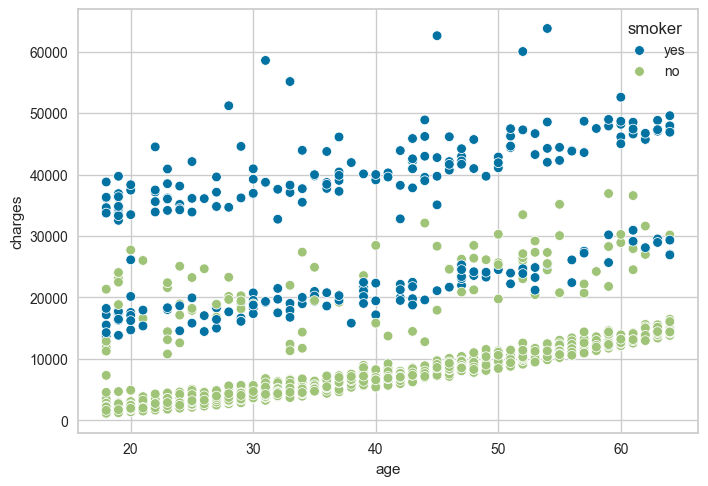

In [11]:
sns.scatterplot(df,x="age", y="charges",hue="smoker")

<Axes: xlabel='bmi', ylabel='charges'>

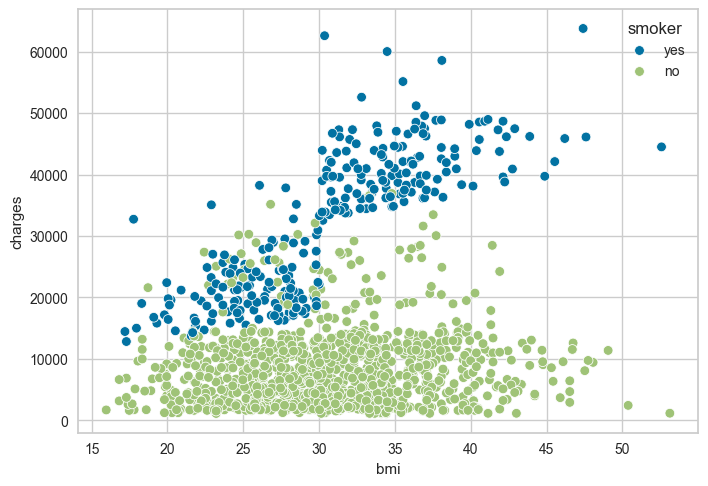

In [12]:
sns.scatterplot(df,x="bmi", y="charges",hue="smoker")

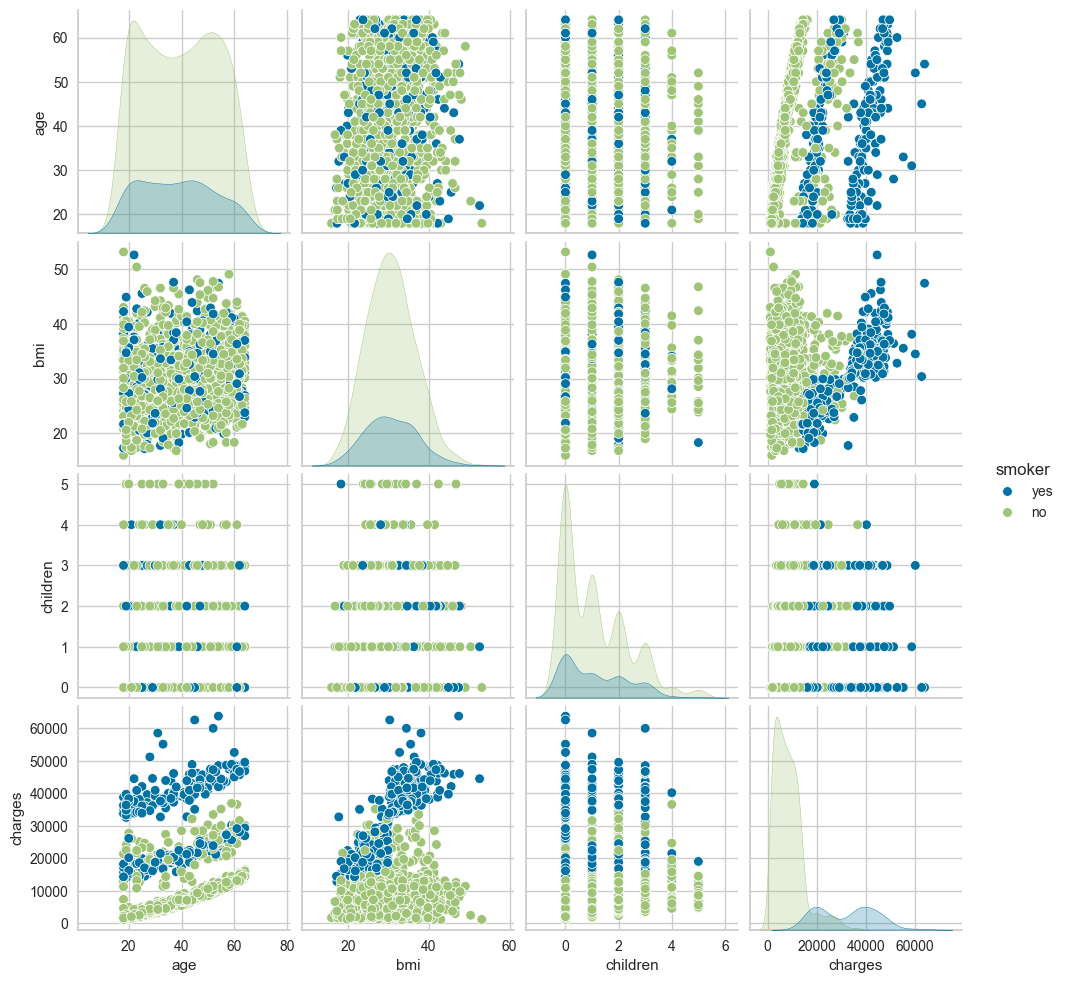

In [18]:
sns.pairplot(df, hue="smoker")

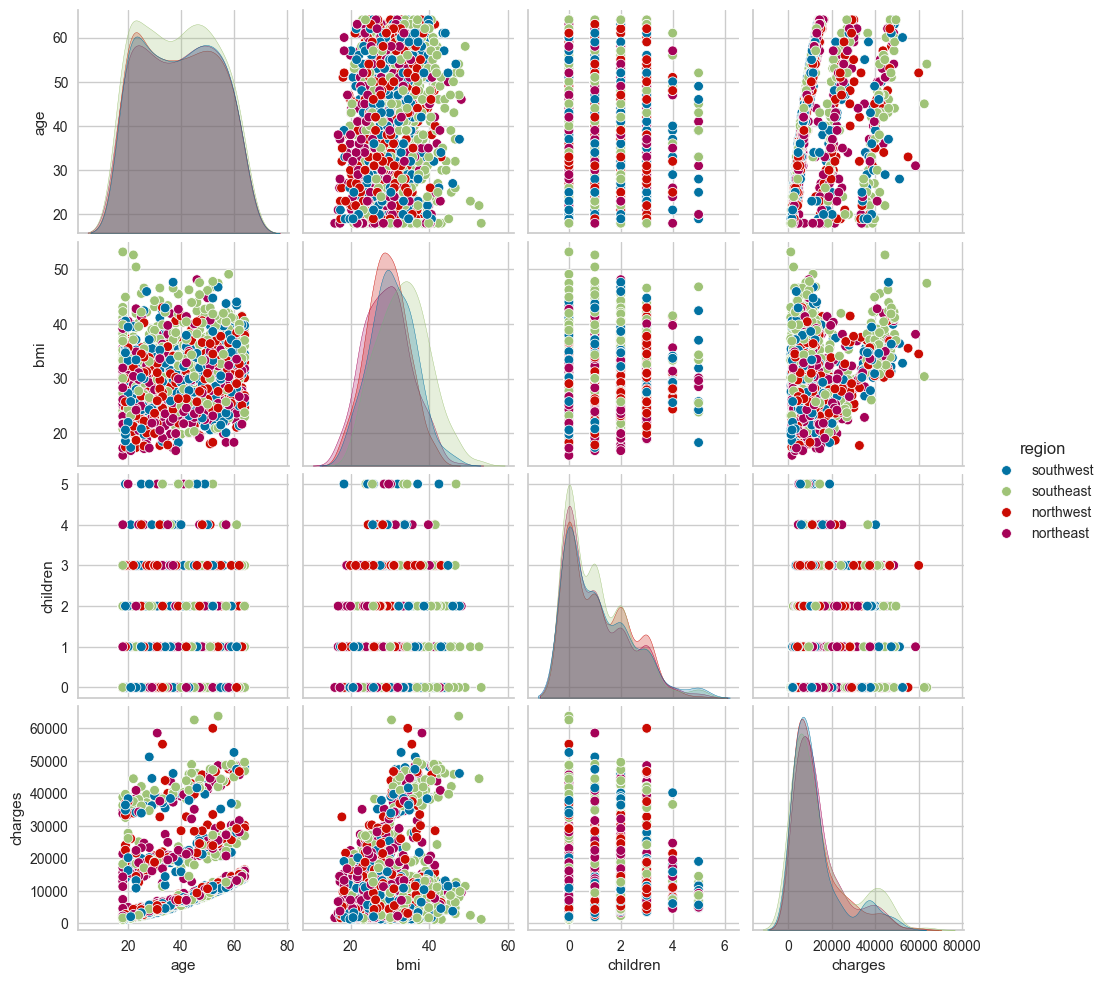

In [19]:
sns.pairplot(df, hue="region")

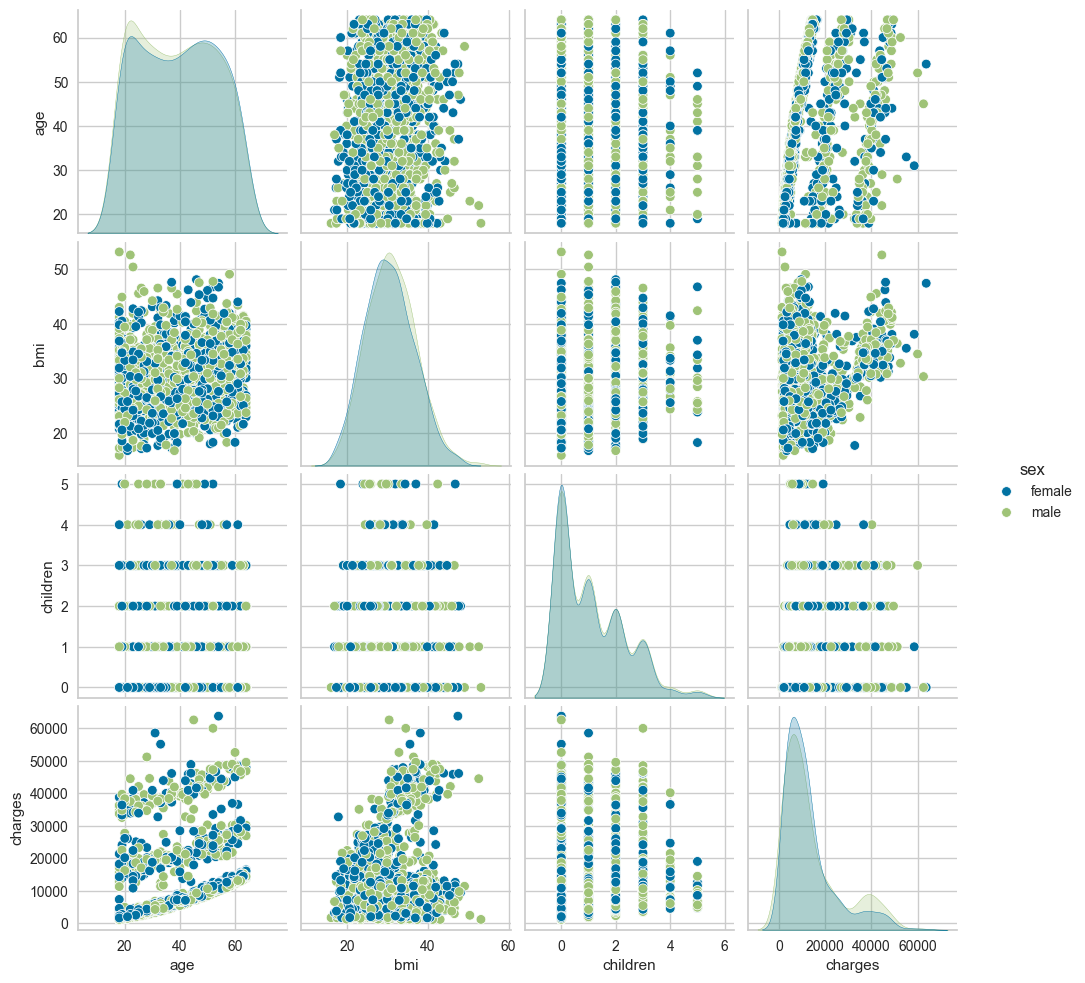

In [20]:
sns.pairplot(df, hue="sex")

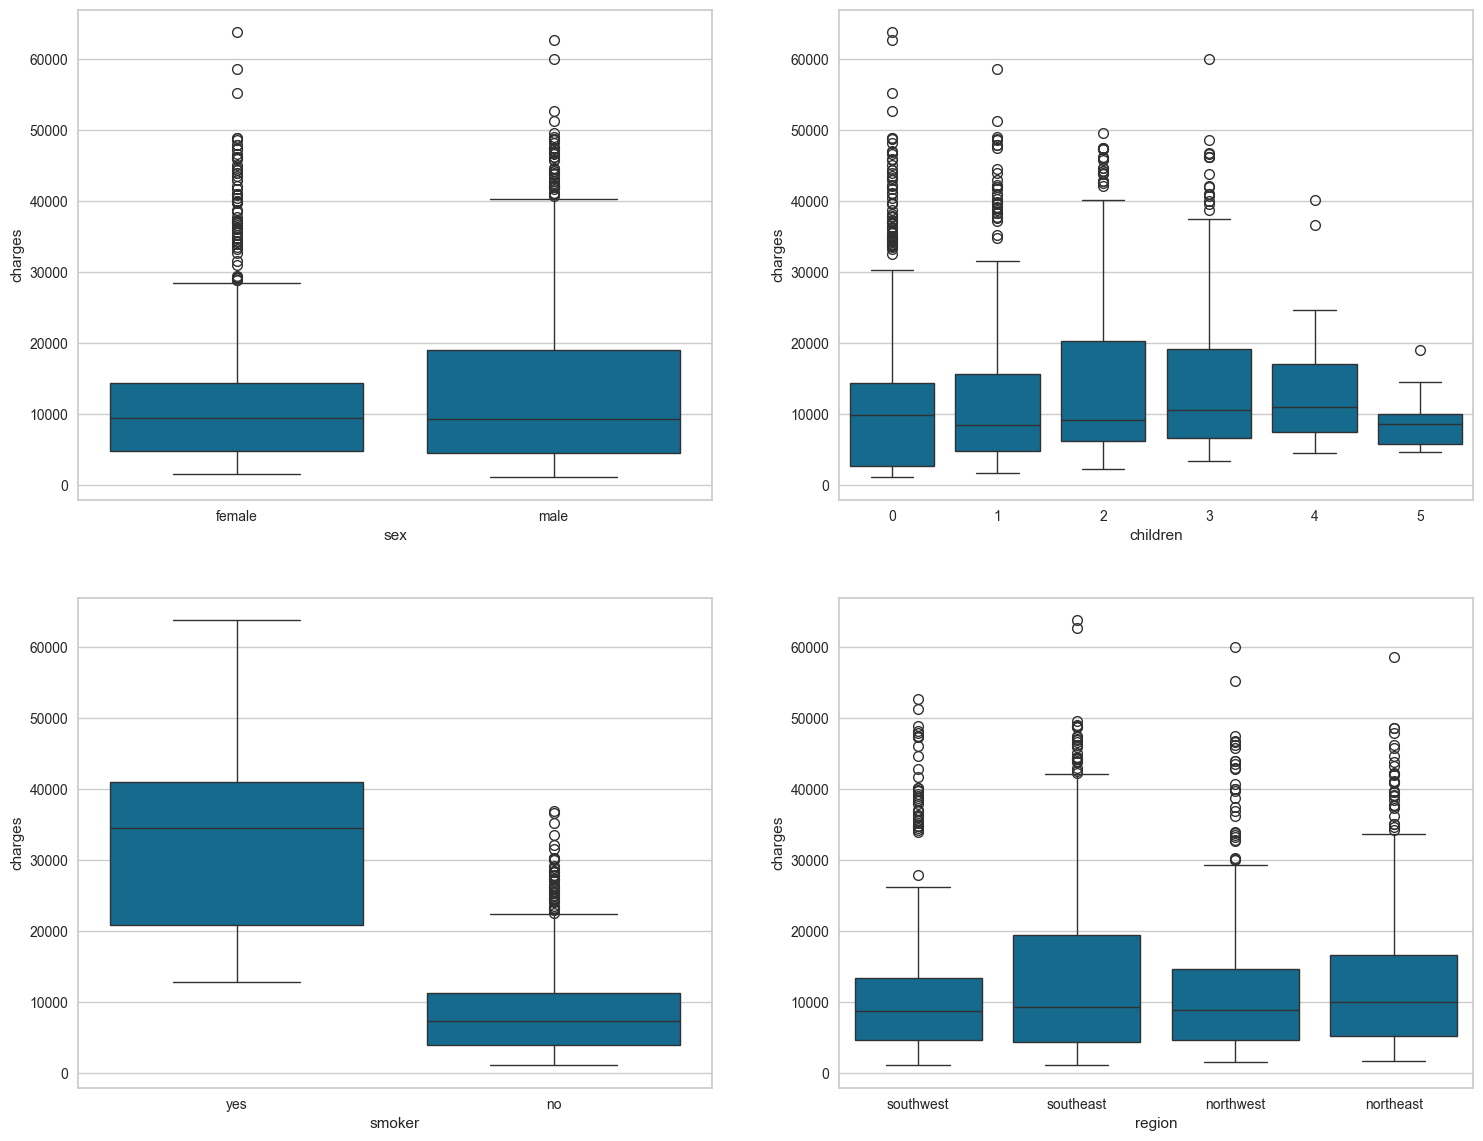

In [22]:
categorical_cols_plot = ["sex", "children", "smoker", "region"]
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,14))
for col, ax in zip(categorical_cols_plot, axes.flatten()):
    sns.boxplot(x=col, y='charges', data=df, ax=ax)

In [27]:
dfc = df.drop().corr()
sns.heatmap(dfc, annot=True, fmt='.2f')

ValueError: could not convert string to float: 'yes'

In [28]:
X = df.drop(columns=["charges"])
y = df["charges"]

In [29]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [31]:
y.head(20)

0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
5      3756.62160
6      8240.58960
7      7281.50560
8      6406.41070
9     28923.13692
10     2721.32080
11    27808.72510
12     1826.84300
13    11090.71780
14    39611.75770
15     1837.23700
16    10797.33620
17     2395.17155
18    10602.38500
19    36837.46700
Name: charges, dtype: float64

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
numerical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("standardizer", MinMaxScaler())
    ]
)

In [35]:
categorical_transformer = OneHotEncoder(drop="if_binary", handle_unknown="ignore", sparse_output=False)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [38]:
preprocessor = ColumnTransformer(
    [
        ("num", numerical_transformer, ["age", "bmi", 'children']),
        ("cat", categorical_transformer, ['smoker', 'region', 'sex'])
    ]
)

In [39]:
preprocessor.fit(x_train, y_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('standardizer',
                                                  MinMaxScaler())]),
                                 ['age', 'bmi', 'children']),
                                ('cat',
                                 OneHotEncoder(drop='if_binary',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['smoker', 'region', 'sex'])])

In [41]:
preprocessor.transform(x_train)

,num__age,num__bmi,num__children,cat__smoker_yes,cat__region_northeast,cat__region_northwest,cat__region_southeast,cat__region_southwest,cat__sex_male
560,0.608696,0.107345,0.4,0.0,0.0,1.0,0.0,0.0,0.0
1285,0.630435,0.224913,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1142,0.739130,0.239440,0.0,0.0,0.0,0.0,1.0,0.0,0.0
969,0.456522,0.493947,1.0,0.0,0.0,0.0,1.0,0.0,0.0
486,0.782609,0.148238,0.6,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1095,0.000000,0.414044,0.8,0.0,1.0,0.0,0.0,0.0,0.0
1130,0.456522,0.212806,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1294,0.869565,0.247915,0.0,0.0,1.0,0.0,0.0,0.0,1.0
860,0.413043,0.851224,0.4,1.0,0.0,0.0,0.0,1.0,0.0


In [42]:
model_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', DummyRegressor())
    ]
)

In [43]:
model_pipeline.named_steps

{'preprocessor': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('standardizer',
                                                   MinMaxScaler())]),
                                  ['age', 'bmi', 'children']),
                                 ('cat',
                                  OneHotEncoder(drop='if_binary',
                                                handle_unknown='ignore',
                                                sparse_output=False),
                                  ['smoker', 'region', 'sex'])]),
 'model': DummyRegressor()}

In [44]:
model_pipeline.named_steps['model']

DummyRegressor()

In [48]:
params = {
    'model': [
        DummyRegressor(),
        LinearRegression(),
        LassoCV(),
        RidgeCV(),
        RandomForestRegressor(),
        GradientBoostingRegressor()
    ]
}

In [51]:
grid_search = GridSearchCV(
    model_pipeline, params, cv=5, scoring='r2', verbose=1
)

In [52]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardizer',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['smoker',
                                                                          'region',
                                                                          'sex'])])),
                                       ('model', DummyRegressor())]),
             param_grid={'model': [DummyRegressor(), LinearRegression(),
                                   LassoCV(), RidgeCV(),
                                   RandomForestRegressor(),
                                   GradientBoostingRegressor()]},
             scoring='r2', verbose=1)

In [53]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('standardizer',
                                                                   MinMaxScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['smoker', 'region',
                                                   'sex'])])),
                ('model', GradientBoostingRegressor())])

In [54]:
grid_search.best_params_

{'model': GradientBoostingRegressor()}

In [58]:
df_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

In [60]:
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.130205,0.002479,0.010199,0.002134,GradientBoostingRegressor(),{'model': GradientBoostingRegressor()},0.833002,0.916364,0.820065,0.791271,0.841133,0.840367,0.041601,1
4,0.363946,0.018984,0.016801,0.000980,RandomForestRegressor(),{'model': RandomForestRegressor()},0.821882,0.900810,0.798287,0.781633,0.837510,0.828025,0.041139,2
2,0.156984,0.072624,0.015565,0.007535,LassoCV(),{'model': LassoCV()},0.716589,0.801085,0.724252,0.658488,0.765938,0.733270,0.048204,3
3,0.031070,0.017530,0.029811,0.020833,RidgeCV(),{'model': RidgeCV()},0.715951,0.801985,0.723093,0.657891,0.766714,0.733127,0.048838,4
1,0.039303,0.009774,0.017600,0.004543,LinearRegression(),{'model': LinearRegression()},0.713401,0.802823,0.722961,0.658255,0.765978,0.732684,0.049059,5
0,0.029600,0.005276,0.012303,0.003839,DummyRegressor(),{'model': DummyRegressor()},-0.000252,-0.013916,-0.004844,-0.000009,-0.004960,-0.004796,0.005035,6


In [61]:
model_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', GradientBoostingRegressor())
    ]
)

params = {
    "model__learning_rate": [.1, .01, .005],
    "model__max_depth": [3, 4, 5, 8],
    "model__n_estimators": [300, 400, 500, 150],
    "model__subsample": [1., .8],
}

grid_search = GridSearchCV(
    model_pipeline, params, cv=5, scoring='r2', verbose=1
)

grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardizer',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['smoker',
                                                                          'region',
                                                                          'sex'])])),
                                       ('model', GradientBoostingRegressor())]),
             param_grid={'model__learning_rate': [0.1, 0.01, 0.005],
                         'model__max_depth': [3, 4, 5, 8],
                         'model__n_estimators': [300, 400, 500, 150],
                         'model__subsample': [1.0, 0.8]},
             scoring='r2', verbose=1)

In [62]:
df_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

In [63]:
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
35,0.437420,0.018125,0.009400,0.001020,0.010,3,400,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.839564,0.923707,0.833895,0.799936,0.853052,0.850031,0.040784,1
37,0.543391,0.022649,0.008598,0.000799,0.010,3,500,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.838491,0.923783,0.832449,0.798131,0.853282,0.849227,0.041431,2
34,0.425451,0.004184,0.009215,0.001435,0.010,3,400,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.839042,0.921612,0.832885,0.797102,0.851560,0.848440,0.040816,3
33,0.327285,0.003762,0.008397,0.001023,0.010,3,300,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.840932,0.920294,0.832738,0.797421,0.850178,0.848313,0.040179,4
36,0.528081,0.011158,0.009197,0.000747,0.010,3,500,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.838499,0.922397,0.831390,0.795918,0.849630,0.847567,0.041510,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0.210920,0.013004,0.008600,0.001625,0.005,4,150,1.0,"{'model__learning_rate': 0.005, 'model__max_de...",0.683405,0.711608,0.638192,0.613649,0.650723,0.659515,0.034409,92
95,0.331947,0.012700,0.010000,0.001096,0.005,8,150,0.8,"{'model__learning_rate': 0.005, 'model__max_de...",0.676708,0.721873,0.630048,0.602984,0.652683,0.656859,0.040644,93
71,0.170948,0.001540,0.008780,0.001718,0.005,3,150,0.8,"{'model__learning_rate': 0.005, 'model__max_de...",0.678861,0.708628,0.638642,0.614180,0.642622,0.656587,0.033226,94
70,0.181995,0.023427,0.008398,0.002059,0.005,3,150,1.0,"{'model__learning_rate': 0.005, 'model__max_de...",0.679669,0.705211,0.637773,0.612983,0.641181,0.655363,0.032809,95
